---
# <center>Principal components analysis (PCA)</center>
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import some data

In [23]:
from sklearn.datasets import fetch_california_housing

X, _ = fetch_california_housing(return_X_y=True)
X = pd.DataFrame(X)
X

#Save this data in my data folder
X.to_csv('CA Housing Data')

## Scatter plot

<Axes: xlabel='6', ylabel='7'>

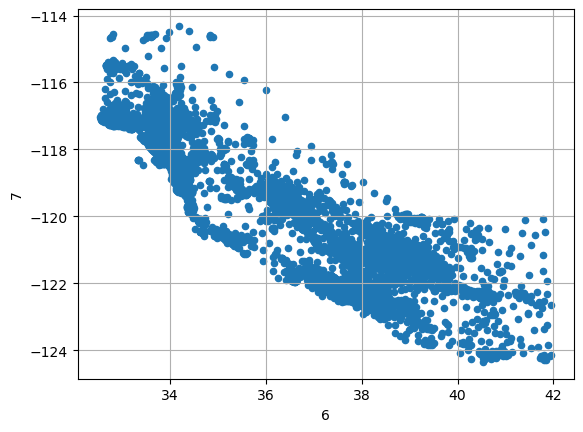

In [24]:
X.plot(kind='scatter',x=6,y=7, grid=True)

# Step 1: Normalize the data

<img src="Xnorm.png" alt="Drawing" style="width: 200px;"/>

In [15]:
X.describe()
# Use this to see the mean of each column. We want it to be 0!

,0,1,2,3,4,5,6,7
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [16]:
mu = X.mean()
sigma = X.std()

In [17]:
# Note that this is the normalization formula here

Xnorm = (X - mu)/sigma

In [18]:
Xnorm.std()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
dtype: float64

In [19]:
Xnorm.mean()

0    4.406467e-17
1    1.101617e-17
2    6.885104e-17
3   -1.018995e-16
4   -1.514723e-17
5    2.754042e-18
6   -1.035520e-15
7   -8.526513e-15
dtype: float64

<Axes: xlabel='6', ylabel='7'>

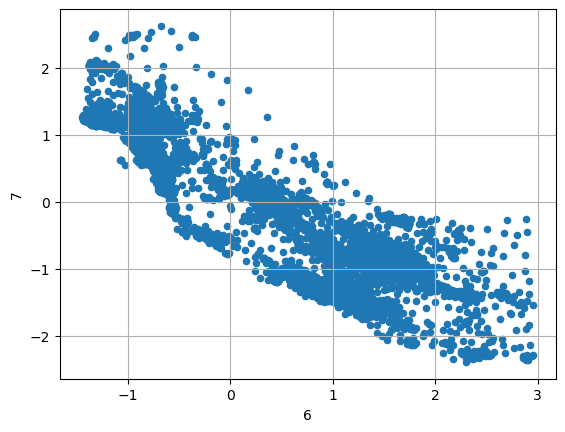

In [20]:
Xnorm.plot(kind='scatter', x=6, y=7, grid=True)

# Step 2: Perform SVD on the normalized data

<img src="svd.png" alt="Drawing" style="width: 200px;"/>

In [21]:
from scipy.linalg import svd

U, s, Vt = svd(Xnorm,full_matrices=False)
Sigma = np.diag(s)
V = Vt.T

## We can check the decomposition

In [7]:
np.allclose(Xnorm, U@Sigma@V.T)

True

## We can recover the original dataset from the decomposition

<img src="unXnorm.png" alt="Drawing" style="width: 200px;"/>

In [18]:
Xrecoverd = mu + sigma * pd.DataFrame(U@Sigma@V.T)
np.allclose(X, Xrecoverd)

True